In [1]:
from bs4 import BeautifulSoup
def read_message_box(box_name = 'message_1.html',   results = []):
  # Read the HTML file
  with open(box_name, 'r', encoding='utf-8') as file:
      html_content = file.read()

  # Parse the HTML content
  soup = BeautifulSoup(html_content, 'html.parser')

  # Find the parent div with the class _a706
  parent_div = soup.find('div', class_='_a706')

  # Prepare a list to store results

  # Get all child divs under the parent div with the specified class
  if parent_div:
      child_divs = parent_div.find_all('div', class_='pam _3-95 _2ph- _a6-g uiBoxWhite noborder')
      for div in child_divs:
          # Extract the name
          name_div = div.find('div', class_='_3-95 _2pim _a6-h _a6-i')
          # Extract the time
          time_div = div.find('div', class_='_3-94 _a6-o')

          name = name_div.get_text(strip=True) if name_div else None
          time = time_div.get_text(strip=True) if time_div else None

          # Store the data based on the name condition
          if name == "Tony Fong":
              results.append([1, time])  # Store as {1, time}
          else:
              results.append([2, time])  # Store as {2, time}


results = []
read_message_box("message_1.html", results)


# Print the results
for result in results:
    print(result)

reversed_results = []
for result in results:
  reversed_results.append([2 - result[0] + 1, result[1]])

[1, 'Jan 13, 2025 11:05 pm']
[1, 'Jan 13, 2025 11:05 pm']
[1, 'Jan 13, 2025 11:04 pm']
[1, 'Jan 13, 2025 8:11 pm']
[1, 'Jan 13, 2025 8:11 pm']
[1, 'Jan 13, 2025 8:10 pm']
[2, 'Jan 13, 2025 5:00 pm']
[1, 'Jan 13, 2025 8:15 am']
[2, 'Jan 13, 2025 8:10 am']
[2, 'Jan 13, 2025 8:10 am']
[1, 'Jan 12, 2025 7:58 pm']
[1, 'Jan 12, 2025 7:58 pm']
[1, 'Jan 12, 2025 7:56 pm']
[2, 'Jan 12, 2025 6:21 pm']
[2, 'Jan 12, 2025 3:12 pm']
[1, 'Jan 12, 2025 9:14 am']
[1, 'Jan 12, 2025 9:14 am']
[1, 'Jan 12, 2025 9:09 am']
[1, 'Jan 12, 2025 9:09 am']
[1, 'Jan 12, 2025 12:08 am']
[2, 'Jan 11, 2025 7:37 pm']
[1, 'Jan 11, 2025 6:25 am']
[2, 'Jan 10, 2025 11:06 pm']
[1, 'Jan 10, 2025 6:31 pm']
[2, 'Jan 10, 2025 12:41 pm']
[1, 'Jan 09, 2025 10:23 pm']
[2, 'Jan 09, 2025 10:22 pm']
[1, 'Jan 08, 2025 10:18 pm']
[1, 'Jan 08, 2025 10:17 pm']
[1, 'Jan 08, 2025 9:24 pm']
[1, 'Jan 08, 2025 6:53 am']
[2, 'Jan 08, 2025 6:53 am']
[1, 'Jan 08, 2025 6:03 am']
[1, 'Jan 08, 2025 6:02 am']
[1, 'Jan 08, 2025 6:02 am']
[1, 'Jan 0

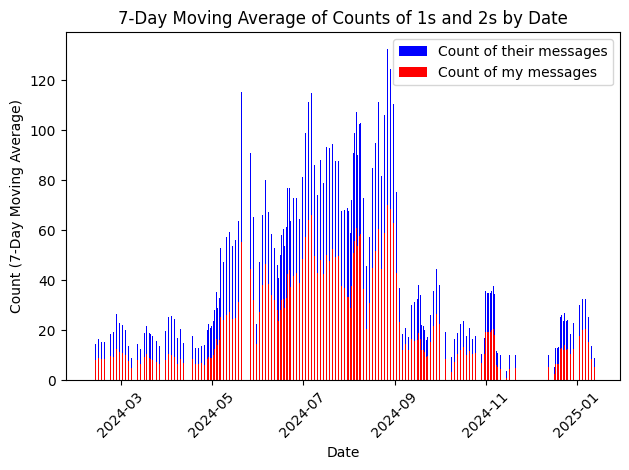

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import Counter
import numpy as np

# Given data
data = results
n = 7

# Process the data

count_data = Counter()
for value, date_str in data:
    # Convert string to date
    date = datetime.strptime(date_str, '%b %d, %Y %I:%M %p').date()
    count_data[(date, value)] += 1

# Prepare data for plotting
days = sorted(set(date for date, _ in count_data.keys()))
count_1 = [count_data.get((day, 1), 0) for day in days]
count_2 = [count_data.get((day, 2), 0) for day in days]

# Calculate 3-day moving average
count_1_avg = np.convolve(count_1, np.ones(n)/n, mode='valid')
count_2_avg = np.convolve(count_2, np.ones(n)/n, mode='valid')

# Prepare x-axis for moving average
days_avg = days[n-1:]  # Since we lose two points for the moving average

# Plotting
plt.bar(days_avg, count_2_avg, color='blue', label='Count of their messages', width=0.4, align='center', bottom=count_1_avg)
plt.bar(days_avg, count_1_avg, color='red', label='Count of my messages', width=0.4, align='center')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel(f'Count ({n}-Day Moving Average)')
plt.title(f'{n}-Day Moving Average of Counts of 1s and 2s by Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

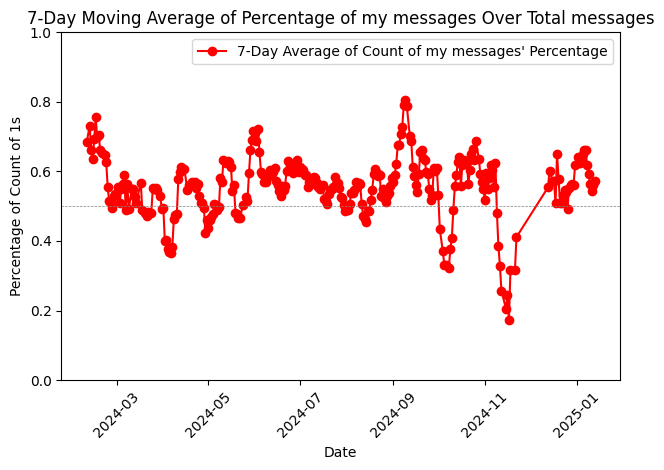

In [17]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
import numpy as np

# Given data
data = results

# Process the data
count_data = Counter()
for value, date_str in data:
    # Convert string to date
    date = datetime.strptime(date_str, '%b %d, %Y %I:%M %p').date()
    count_data[(date, value)] += 1

# Prepare data for plotting
days = sorted(set(date for date, _ in count_data.keys()))
count_1 = [count_data.get((day, 1), 0) for day in days]
count_2 = [count_data.get((day, 2), 0) for day in days]

# Calculate total counts for percentage calculation
total_counts = np.array(count_1) + np.array(count_2)

# Calculate the percentage of 1s over (1s + 2s)
percentage_1 = np.array(count_1) / total_counts
percentage_1[total_counts == 0] = 0  # Avoid division by zero

# Calculate 7-day moving average of the percentage
percentage_1_avg = np.convolve(percentage_1, np.ones(7)/7, mode='valid')

# Prepare x-axis for moving average
days_avg = days[6:]  # Since we lose six points for the moving average

# Plotting
plt.plot(days_avg, percentage_1_avg, color='red', label='7-Day Average of Count of my messages\' Percentage', marker='o')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Percentage of Count of 1s')
plt.title('7-Day Moving Average of Percentage of my messages Over Total messages')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(0.5, color='grey', linestyle='--', linewidth=0.5)  # Optional: Add a reference line at 50%
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

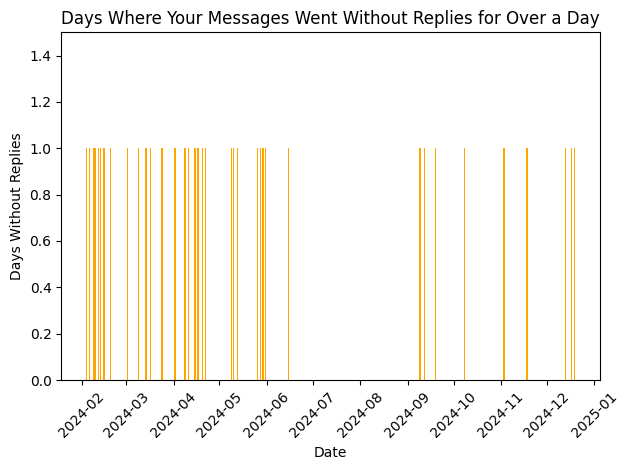

Days where your message went without replies for over a day: 77


In [14]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Given data
data = results

# Parse timestamps and organize by value
messages = []
for value, date_str in data:
    timestamp = datetime.strptime(date_str, '%b %d, %Y %I:%M %p')
    messages.append((value, timestamp))

# Sort messages by timestamp
messages.sort(key=lambda x: x[1])

# Initialize variables to track the count of days without replies
days_without_replies = 0
no_reply_dates = set()
last_message_time = None
last_message_value = None

# Iterate through messages
for value, timestamp in messages:
    if value == 1:  # Your message
        # Check if there's been a reply within the next day
        if last_message_time and last_message_value == 2 and (timestamp - last_message_time) <= timedelta(days=1):
            continue  # There was a reply
        else:
            days_without_replies += 1
            no_reply_dates.add(timestamp.date())  # Record the date

    last_message_time = timestamp
    last_message_value = value

# Prepare data for plotting
dates = list(no_reply_dates)
counts = [1] * len(dates)  # Each date corresponds to a count of 1

# Plotting the result
plt.bar(dates, counts, color='orange')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Days Without Replies')
plt.title('Days Where Your Messages Went Without Replies for Over a Day')
plt.xticks(rotation=45)
plt.ylim(0, 1.5)  # Set y-axis limit for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Output the result
print(f"Days where your message went without replies for over a day: {days_without_replies}")

In [10]:
print(reversed_results[0])

[[2], 'Jan 13, 2025 11:05 pm']


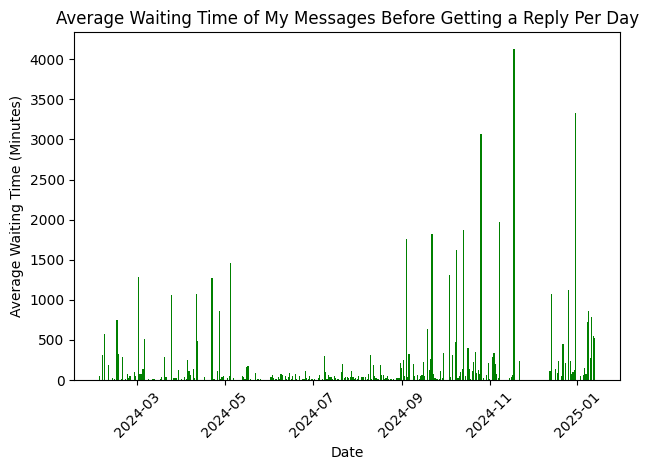

Average waiting time on 2024-02-04: 54.00 minutes
Average waiting time on 2024-02-06: 310.00 minutes
Average waiting time on 2024-02-07: 569.50 minutes
Average waiting time on 2024-02-08: 0.29 minutes
Average waiting time on 2024-02-10: 189.25 minutes
Average waiting time on 2024-02-12: 0.00 minutes
Average waiting time on 2024-02-13: 21.12 minutes
Average waiting time on 2024-02-14: 11.00 minutes
Average waiting time on 2024-02-16: 755.00 minutes
Average waiting time on 2024-02-17: 327.75 minutes
Average waiting time on 2024-02-18: 2.50 minutes
Average waiting time on 2024-02-19: 19.60 minutes
Average waiting time on 2024-02-20: 287.12 minutes
Average waiting time on 2024-02-22: 19.43 minutes
Average waiting time on 2024-02-23: 73.50 minutes
Average waiting time on 2024-02-24: 22.83 minutes
Average waiting time on 2024-02-25: 52.00 minutes
Average waiting time on 2024-02-26: 5.23 minutes
Average waiting time on 2024-02-27: 0.40 minutes
Average waiting time on 2024-02-28: 101.50 minute

In [20]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Given data
data = results

# Parse timestamps and organize them
messages = []
for value, date_str in data:
    timestamp = datetime.strptime(date_str, '%b %d, %Y %I:%M %p')
    messages.append((value, timestamp))

# Sort messages by timestamp
messages.sort(key=lambda x: x[1])

# Initialize dictionary to store waiting times per day
waiting_times = defaultdict(list)
last_message_time = None
last_message_value = None

# Iterate through messages
for value, timestamp in messages:
    if value == 1:  # Your message
        last_message_time = timestamp
        last_message_value = value
    elif value == 2 and last_message_time:  # Reply to your message
        waiting_time = (timestamp - last_message_time).total_seconds() / 60  # Convert to minutes
        waiting_times[last_message_time.date()].append(waiting_time)
        last_message_time = None  # Reset after handling reply

# Calculate average waiting times per day
average_waiting_times = {date: sum(times) / len(times) for date, times in waiting_times.items() if times}

# Prepare data for plotting
dates = list(average_waiting_times.keys())
averages = list(average_waiting_times.values())

# Plotting the results
plt.bar(dates, averages, color='green')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (Minutes)')
plt.title('Average Waiting Time of My Messages Before Getting a Reply Per Day')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Output the average waiting times
for date, avg_time in average_waiting_times.items():
    print(f"Average waiting time on {date}: {avg_time:.2f} minutes")

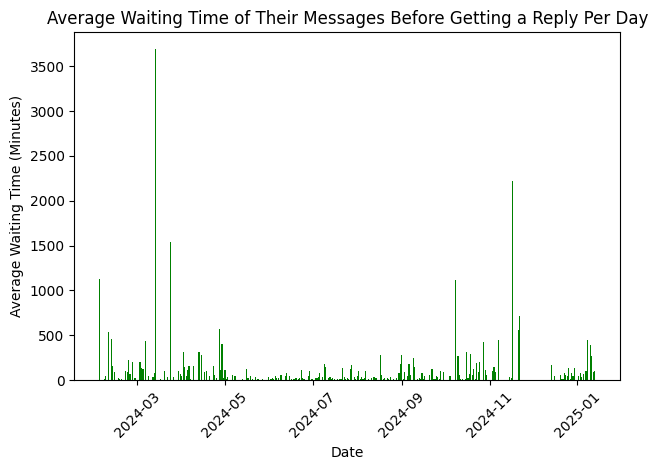

Average waiting time on 2024-02-04: 1124.00 minutes
Average waiting time on 2024-02-06: 3.00 minutes
Average waiting time on 2024-02-07: 8.00 minutes
Average waiting time on 2024-02-08: 46.38 minutes
Average waiting time on 2024-02-10: 532.00 minutes
Average waiting time on 2024-02-12: 462.00 minutes
Average waiting time on 2024-02-13: 152.25 minutes
Average waiting time on 2024-02-14: 91.20 minutes
Average waiting time on 2024-02-17: 21.00 minutes
Average waiting time on 2024-02-18: 10.20 minutes
Average waiting time on 2024-02-19: 14.60 minutes
Average waiting time on 2024-02-20: 3.43 minutes
Average waiting time on 2024-02-22: 96.75 minutes
Average waiting time on 2024-02-23: 95.00 minutes
Average waiting time on 2024-02-24: 224.43 minutes
Average waiting time on 2024-02-25: 72.00 minutes
Average waiting time on 2024-02-26: 0.54 minutes
Average waiting time on 2024-02-27: 206.17 minutes
Average waiting time on 2024-02-28: 23.50 minutes
Average waiting time on 2024-02-29: 23.12 minut

In [19]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Given data
data = reversed_results

# Parse timestamps and organize them
messages = []
for value, date_str in data:
    timestamp = datetime.strptime(date_str, '%b %d, %Y %I:%M %p')
    messages.append((value, timestamp))

# Sort messages by timestamp
messages.sort(key=lambda x: x[1])

# Initialize dictionary to store waiting times per day
waiting_times = defaultdict(list)
last_message_time = None
last_message_value = None

# Iterate through messages
for value, timestamp in messages:
    if value == 1:  # Your message
        last_message_time = timestamp
        last_message_value = value
    elif value == 2 and last_message_time:  # Reply to your message
        waiting_time = (timestamp - last_message_time).total_seconds() / 60  # Convert to minutes
        waiting_times[last_message_time.date()].append(waiting_time)
        last_message_time = None  # Reset after handling reply

# Calculate average waiting times per day
average_waiting_times = {date: sum(times) / len(times) for date, times in waiting_times.items() if times}

# Prepare data for plotting
dates = list(average_waiting_times.keys())
averages = list(average_waiting_times.values())

# Plotting the results
plt.bar(dates, averages, color='green')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (Minutes)')
plt.title('Average Waiting Time of Their Messages Before Getting a Reply Per Day')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Output the average waiting times
for date, avg_time in average_waiting_times.items():
    print(f"Average waiting time on {date}: {avg_time:.2f} minutes")